## Região de Estabilidade do Método RK4

Vamos considerar o problema escalar padrão para a análise de estabilidade:

$ \frac{du}{dt} = \lambda u \Rightarrow \int \frac{du}{u} = \int \lambda dt \Rightarrow \ln u = \lambda t + c \Rightarrow u(t) = ce^{\lambda t}, f(t, u) = \lambda u$

Para o método de Runge-Kutta, temos:

$$ u_{n+1} = u_n + \frac{h}{6}(k_1 + 2k_2 + 2k_3 + k_4) $$

Tal que:

$$ k_1 = f(t_n, u_n) = f_n \\
k_2 = f\left(t_n + \frac{h}{2}, u_n + \frac{h k_1}{2}\right) \\
k_3 = f\left(t_n + \frac{h}{2}, u_n + \frac{h k_2}{2}\right) \\
k_4 = f(t_n + h, u_n + h k_3) $$

Substituindo os $f$ pela expressão exponencial aberta:

$$ k_1 = \lambda u_n = f_n \\
k_2 = \lambda \left( u_n + \frac{h k_1}{2} \right) = \lambda u_n + \frac{\lambda h k_1}{2} = \lambda u_n + \frac{\lambda h \lambda u_n}{2} = \lambda u_n + \frac{ \lambda^2 h u_n }{2} \\
k_3 = \lambda \left( u_n + \frac{h k_2}{2} \right) = \lambda u_n + \frac{\lambda h k_2}{2} = \lambda u_n + \frac{\lambda h \left( \lambda u_n + h \frac{\lambda^2 u_n}{2} \right)}{2} = \lambda u_n + \frac{ \lambda^2 h u_n + \frac{\lambda^3 h^2 u_n}{2} }{2} = \lambda u_n + \frac{\lambda^2 h u_n}{2} + \frac{\lambda^3 h^2 u_n}{4} \\
k_4 = \lambda \left( u_n + h k_3\right) = \lambda u_n + \lambda h k_3 = \lambda u_n + \lambda h \left( \lambda u_n + \frac{\lambda^2 h u_n}{2} + \frac{\lambda^3 h^2 u_n}{4} \right) = \lambda u_n + \lambda^2 h u_n + \frac{\lambda^3 h^2 u_n}{2} + \frac{\lambda^4 h^3 u_n}{4} \\
u_{n+1} = u_n + \frac{h}{6} \left( \lambda u_n + 2 \lambda u_n + \lambda^2 h u_n + 2 \lambda u_n + \lambda^2 h u_n + \frac{\lambda^3 h^2 u_n }{2} + \lambda u_n + \lambda^2 h u_n + \frac{\lambda^3 h^2 u_n}{2} + \frac{\lambda^4 h^3 u_n}{4} \right) = \\
u_n + \lambda h u_n + \frac{\lambda^2 h^2 u_n}{2} + \frac{ \lambda^3 h^3 u_n }{6} + \frac{\lambda^4 h^4 u_n}{24} = u_n \left( 1 + \lambda h + \frac{(\lambda h)^2}{2} + \frac{(\lambda h)^3}{5} + \frac{(\lambda h)^4}{24} \right) \\
\Rightarrow u_n = u_0 \left( 1 + \lambda h + \frac{(\lambda h)^2}{2} + \frac{(\lambda h)^3}{6} + \frac{(\lambda h)^4}{24} \right)^n$$

Mas se temos:

$$ \lambda h = x + i y, \text{sendo $i$ a unidade imaginária}$$

Então:

$$ \left| 1 + \lambda h + \frac{(\lambda h)^2}{2} + \frac{(\lambda h)^3}{6} + \frac{(\lambda h)^4}{24} \right| < 1 \Rightarrow  \left| 1 + (x + i y) + \frac{(x + i y)^2}{2} + \frac{(x + i y)^3}{6} + \frac{(x + i y)^4}{24} \right| < 1$$

Como a resolução da inequação acima, manualmente, é trabalhosa, resolvemos usar o Sympy:

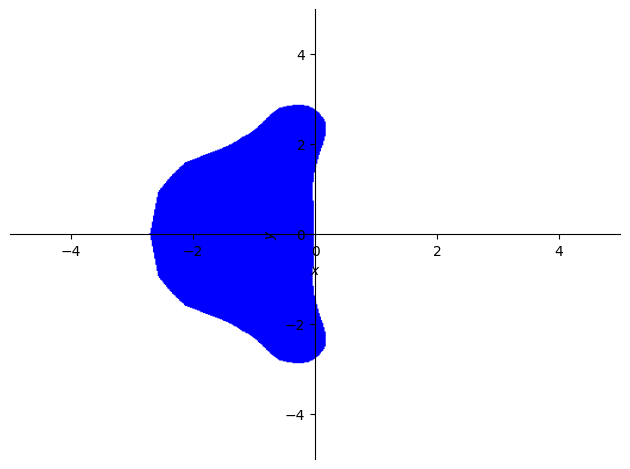

In [1]:
import sympy as s

I = s.I
x, y = s.symbols("x y", real=True)
area = 1 + (x + y*I) + (x + y*I)**2/2 + (x + y*I)**3/6 + (x + y*I)**4/24
X = s.re(area)
Y = s.im(area)
complex_abs = (X**2 + Y**2)**(1/2)

p1 = s.plot_implicit(complex_abs < 1)